In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
data = pd.read_csv('test.csv')
dataset_2 = pd.read_csv('Sleepdata_example_1440.csv')

In [9]:
data = data['sleep'].values
data

array([0., 0., 0., ..., 1., 1., 1.])

In [8]:
dataset_2 = dataset_2['Asleep'].values
dataset_2

array([nan, nan, nan, ...,  0.,  0.,  0.])

In [11]:
print(f"Data contains {len(data)} datapoints")
print(f"Dataset2 contains {len(dataset_2)} datapoints")

Data contains 17704 datapoints
Dataset2 contains 145440 datapoints


In [15]:
data = data[0:17280]

In [13]:
print(f"Data contains {len(data)/2880} days")
print(f"Dataset_2 contains {len(dataset_2)/1440} days")

Data contains 6.147222222222222 days
Dataset_2 contains 101.0 days


In [114]:
np.unique(data, return_counts=True)

(array([ 0.,  1., nan, nan, nan, nan, nan]),
 array([10504,  6771,     1,     1,     1,     1,     1], dtype=int64))

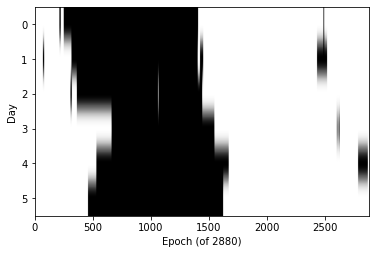

In [17]:
#visualize sleep data
plt.imshow(np.reshape(data, (-1, 2880)).astype('uint8'), cmap="Greys", aspect=300)
plt.xlabel(f"Epoch (of {2880})")
plt.ylabel("Day")
plt.show()

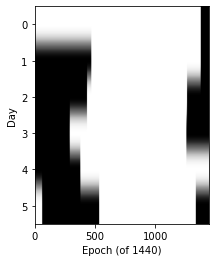

In [27]:
#visualize sleep data
plt.imshow(np.reshape(dataset_2[0:8640], (-1, 1440)).astype('uint8'), cmap="Greys", aspect=300, interpolation=None)
plt.xlabel(f"Epoch (of {1440})")
plt.ylabel("Day")
plt.show()

SRI was computed as the likelihood that any two time-points (minute-by-minute) 24 h apart were the same sleep/wake state, across all days. The value could theoretically range 0 to 1, and was rescaled (y = 200 (x − 1/2)) to give a range of −100 to 100. This rescaling was chosen to give a more intuitive range. In practice, individuals will only display sleep patterns that range between an SRI of 0 (random) and 100 (periodic). Values less than 0 are still theoretically possible (e.g., sleep for 24 h, wake for 24 h, etc.), but very unlikely to be observed.

Source: https://www.nature.com/articles/s41598-017-03171-4

In [31]:
def compare_sleep(list_to_compare):
    '''function to calculate the amount of regularity of a sleeping time (e.g. the regularity at 11:15 or 19:00)'''
    # calculate if there are differences between days that follow eachother
    result = np.diff(list_to_compare)
    
    # remove Nan-values for list of differences, add one to each difference (e.g. 0 (no difference) becomes 1 etc.) and
    # calculate the residual when dividing by two (points where there is a difference will then be 1 and otherwise 0)
    result = ((result[~np.isnan(result)])+1)%2
    
    # calculate percentage of consistent wake/sleeping
    result = sum(result)/len(result)
    
    return result


compare_sleep([1,1,0,0,0])

0.75

In [36]:
def SRI_SCORE(data, daily_datapoints=1440):
    '''Function to calculate the Sleep Regularity Index (SRI) for the given data
       daily datapoints: 1440 (1-minute points), 2880 (30 second points)'''
    
    # reshape data into seperate days according to the daily datapoints
    sleep_data = np.reshape(data, (daily_datapoints, -1), order='F')
    #print(sleep_data)
    
    # calculate a list of consistency at all daily datapoints
    consistency = [compare_sleep(i) for i in sleep_data if np.sum(~np.isnan(np.diff(i)))>0]
    #print(consistency)
    #print(np.mean(consistency))
    
    #calculate and return SRI-score
    #return round((200*np.mean(consistency))-100, 2)
    return round((200*(np.mean(consistency)-0.5)), 2)
    
SRI_SCORE(data=[0,0,1,1,0,0,0,1,0,1,1,1,0,0,1,1], daily_datapoints=4)

33.0

In [37]:
SRI_SCORE(data, daily_datapoints=2880)

81.0

In [40]:
SRI_SCORE(dataset_2, daily_datapoints=1440)

74.0

In [43]:
SRI_SCORE(dataset_2[54720:84960], daily_datapoints=1440)

71.0

In [48]:
for i in range(6):
    print(SRI_SCORE(dataset_2[21600*i:21600*(i+1)]))          

72.0
71.0
76.0
72.0
69.0
84.0
